# Étape 1 : Charger et préparer les données

In [80]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('transition_energetique_pays_2023.csv')

# Afficher les premières lignes du fichier
df.head()


,Pays,Taux d'énergie renouvelable,Année,Investissements en énergies renouvelables (% du PIB),PIB par habitant (USD),Taux de scolarisation secondaire (%),Accès à l'électricité (%),Revenu,Dépassement 50%,Classification Transition Énergétique
0,Afghanistan,17.846154,2023,4.838663,415.707417,47.154018,80.861538,Low income,Non,Débutante
1,Africa Eastern and Southern,62.614134,2023,1.346697,1659.515290,69.520690,38.090526,Lower middle income,Oui,Avancée
2,Africa Western and Central,77.223132,2023,0.335375,1568.724310,69.520690,49.108581,Lower middle income,Oui,Avancée
3,Albania,39.283333,2023,0.000000,8575.171134,86.322940,99.915385,Upper middle income,Non,Intermédiaire
4,Algeria,0.150000,2023,0.018654,5364.027950,69.520690,99.392308,Upper middle income,Non,Débutante


# Étape 2 : Prétraitement des données

In [81]:
# Assurez-vous que toutes les variables nécessaires sont présentes et traitées correctement
# Conversion de la variable cible en binaire : 1 si le pays dépasse 50% d'énergie renouvelable, 0 sinon
df['Dépassement 50%'] = (df["Taux d'énergie renouvelable"] > 50).astype(int)

# Sélectionner les variables explicatives et la variable cible
X = df[["Accès à l'électricité (%)", "PIB par habitant (USD)", "Taux de scolarisation secondaire (%)"]]
y = df["Dépassement 50%"]


# Étape 3 : Diviser les données en ensembles d'entraînement et de test

In [82]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Étape 4 : Normaliser les données

In [83]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Étape 5 : Entraîner le modèle de régression logistique

In [84]:
from sklearn.linear_model import LogisticRegression

# Initialiser et entraîner le modèle
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

# Étape 6 : Faire des prédictions

In [85]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Probabilités prédites
y_prob = model.predict_proba(X_test_scaled)[:, 1]


# Étape 7 : Évaluer la performance du modèle

## 7.1 Matrice de confusion

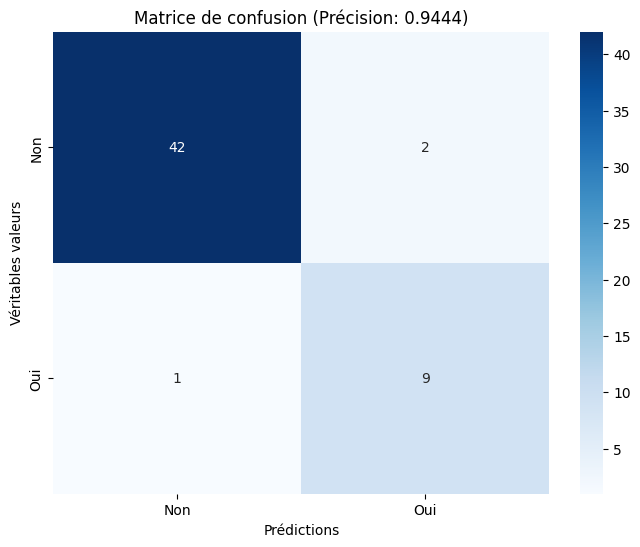

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.xlabel('Prédictions')
plt.ylabel('Véritables valeurs')
plt.title(f'Matrice de confusion (Précision: {accuracy:.4f})')
plt.show()


# Interprétation des résultats

## 1. Matrice de confusion
### Détails des prédictions :
- **Valeurs réelles "Non" (n'ont pas dépassé 50 %) :**
  - **42** prédictions correctes (vrai négatif, TN).
  - **2** prédictions incorrectes (faux positif, FP).

- **Valeurs réelles "Oui" (ont dépassé 50 %) :**
  - **9** prédictions correctes (vrai positif, TP).
  - **1** prédiction incorrecte (faux négatif, FN).

- Cela signifie que **94.44 %** des prédictions du modèle sont correctes, ce qui montre une **excellente performance globale**.

### Analyse détaillée :
- Le modèle est particulièrement performant pour prédire les cas où un pays **ne dépasse pas** 50 % d'énergie renouvelable (fort taux de vrais négatifs).


## 7.2 Courbe ROC et AUC

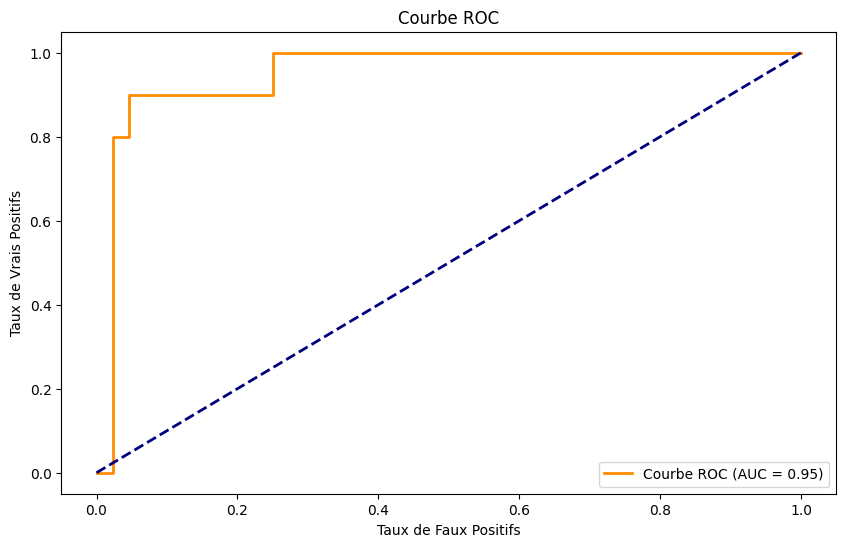

In [87]:
from sklearn.metrics import roc_curve, auc

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


## 2. Courbe ROC et AUC
### AUC (Area Under Curve) :

  AUC = 0.95

- Une AUC de **0.95** indique que le modèle possède une **très bonne capacité** à distinguer entre les pays qui dépassent ou non 50 % d'énergie renouvelable.
- Un AUC proche de 1 reflète une **excellente discrimination** entre les classes.

### Interprétation de la courbe ROC :
- La courbe montre que le modèle atteint un **bon équilibre** entre :
  - Le **taux de vrais positifs (True Positive Rate, TPR)**.
  - Le **taux de faux positifs (False Positive Rate, FPR)**.
- Ici, le modèle **réduit efficacement les faux positifs tout en capturant la majorité des vrais positifs**, ce qui reflète une performance robuste.

---

## Conclusion générale :
Le modèle de régression logistique est **très performant** pour prédire si un pays dépasse ou non 50 % d'énergie renouvelable, comme le montrent :
- La précision globale de **94.44 %**.
- L'AUC de **0.95**, indiquant une capacité de discrimination élevée.
- La matrice de confusion, qui montre peu de faux négatifs et faux positifs.


## 7.3 Histogramme des probabilités prédites


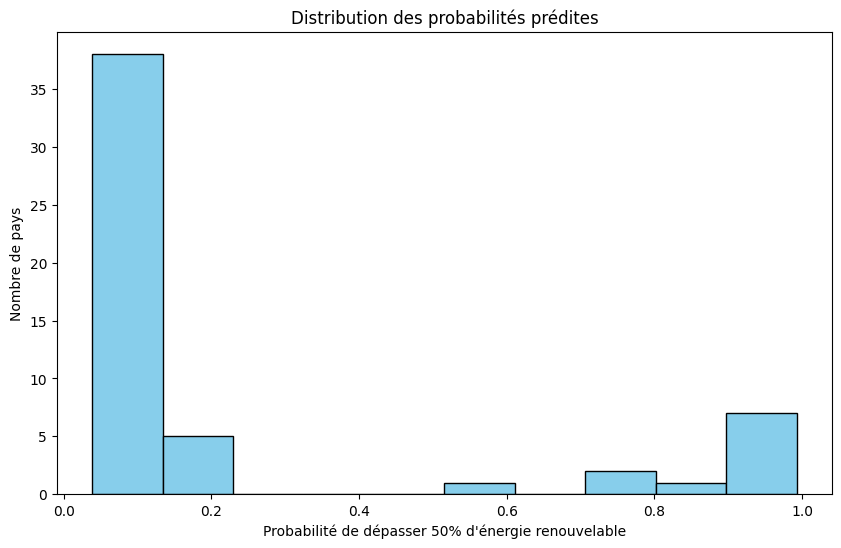

In [88]:
# Visualiser la distribution des probabilités prédites
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des probabilités prédites')
plt.xlabel('Probabilité de dépasser 50% d\'énergie renouvelable')
plt.ylabel('Nombre de pays')
plt.show()


### Interprétations :

#### 1. **Histogramme des probabilités prédites**
**Figure :** Distribution des probabilités prédites pour dépasser 50 % d'énergie renouvelable.  
**Interprétation :**  
La majorité des pays ont une faible probabilité de dépasser 50 % d'énergie renouvelable, comme indiqué par les barres concentrées près de 0. Cela montre que, selon le modèle, peu de pays ont des caractéristiques favorisant une forte intégration des énergies renouvelables dans leur mix énergétique.

## 7.4 Graphique des coefficients du modèle

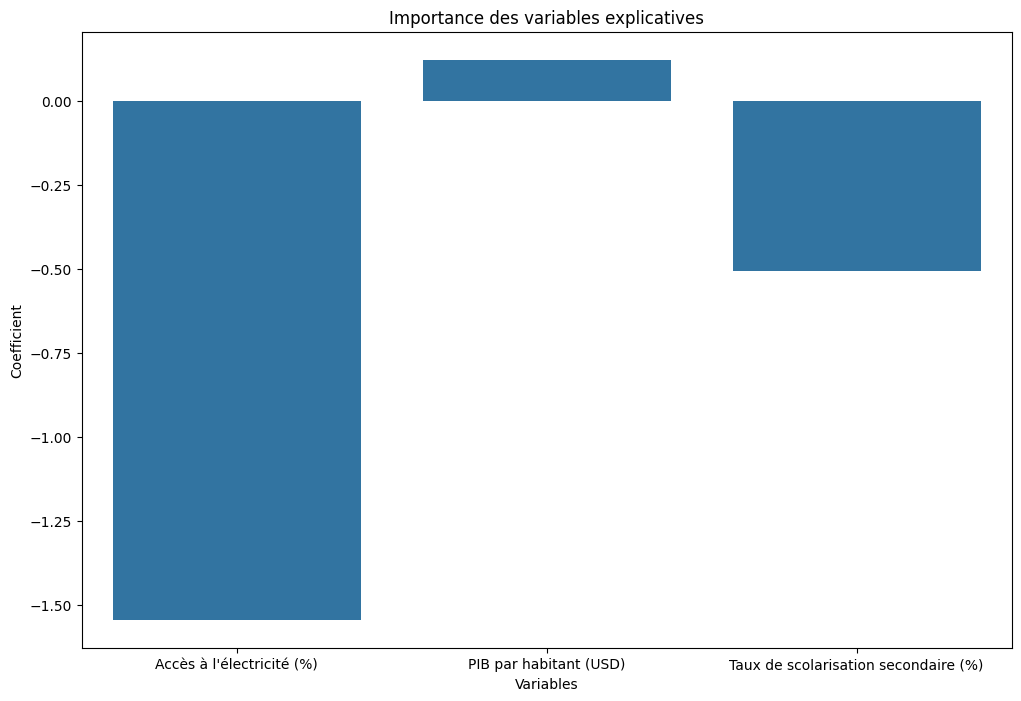

In [89]:
# Affichage des coefficients
coefficients = model.coef_[0]
features = X.columns

# Créer un DataFrame des coefficients
coeff_df = pd.DataFrame(coefficients, features, columns=['Coefficient'])

# Visualiser les coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=coeff_df.index, y=coeff_df['Coefficient'])
plt.title("Importance des variables explicatives")
plt.xlabel("Variables")
plt.ylabel("Coefficient")
plt.show()


#### 2. **Barplot des coefficients des variables explicatives**
**Figure :** Importance des variables explicatives dans la régression logistique.  
**Interprétation :**  
- **Accès à l'électricité (%)** a un coefficient fortement négatif (-1.54), indiquant qu'un meilleur accès à l'électricité est associé à une probabilité plus faible de dépasser le seuil de 50 % d'énergie renouvelable. Cela pourrait être lié à une dépendance accrue à l'électricité issue de sources non renouvelables dans ces pays.
- **Taux de scolarisation secondaire (%)** a également un impact négatif (-0.51), suggérant que des niveaux élevés de scolarisation ne favorisent pas nécessairement l'adoption des énergies renouvelables. Cela pourrait refléter des priorités différentes en matière de développement ou de politique énergétique.
- **PIB par habitant (USD)** a un coefficient légèrement positif (+0.12), indiquant que les pays plus riches ont une légère tendance à dépasser le seuil de 50 % d'énergie renouvelable. Cependant, cet effet est faible et pourrait ne pas être significatif en pratique.


In [90]:
# Afficher les coefficients du modèle
coefficients = model.coef_[0]
features = X.columns

# Afficher les coefficients associés à chaque variable
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')


Accès à l'électricité (%): -1.5435787117466035
PIB par habitant (USD): 0.12235023398679404
Taux de scolarisation secondaire (%): -0.5054327719358664


# Analyse des Résultats de la Régression Logistique

## 1. Quels sont les facteurs déterminants pour qu’un pays dépasse un seuil critique (50 % d’énergie renouvelable dans son mix) ?

### Résumé des résultats :
- **Accès à l’électricité (%)** :
  - Le coefficient associé est **négatif et significatif** (-1.54). 
  - Cela signifie qu'un taux d'électrification élevé est lié à une probabilité plus faible d'atteindre un seuil de 50 % d’énergies renouvelables.
  - **Interprétation** : Les pays avec un accès universel ou très élevé à l’électricité ont souvent des infrastructures établies basées sur des énergies fossiles comme le charbon, le pétrole ou le gaz. Ces infrastructures, bien qu’efficaces pour assurer une électrification massive, freinent la transition vers les énergies renouvelables, car elles nécessitent des investissements conséquents pour leur remplacement. En revanche, dans les régions avec un accès limité à l'électricité, des solutions renouvelables comme les panneaux solaires ou les éoliennes sont souvent privilégiées dès le départ.

- **PIB par habitant (USD)** :
  - Le coefficient est faible et positif (0.12), ce qui montre que le PIB par habitant a une influence limitée sur la probabilité de dépasser 50 % d’énergie renouvelable.
  - **Interprétation** : La richesse économique d’un pays ne garantit pas une transition énergétique. Certains pays à faible PIB, mais riches en ressources naturelles renouvelables (soleil, vent, eau), peuvent dépasser ce seuil en investissant directement dans ces ressources. À l’inverse, les pays riches peuvent diversifier leurs mix énergétiques, intégrant les énergies renouvelables sans nécessairement dépasser les 50 %.

- **Taux de scolarisation secondaire (%)** :
  - Le coefficient est **négatif** (-0.50), indiquant que les pays avec un taux de scolarisation secondaire élevé ont une probabilité légèrement plus faible de dépasser le seuil critique.
  - **Interprétation** : Les pays ayant un haut niveau de scolarisation investissent souvent dans des infrastructures énergétiques diversifiées ou dans des technologies complexes, retardant potentiellement l’adoption exclusive des énergies renouvelables à grande échelle.

---

## 2. Un pays avec un accès à l’électricité élevé a-t-il plus de chances d’adopter des énergies renouvelables à grande échelle ?

### Résumé des résultats :
- **L’accès à l’électricité élevé réduit les chances de dépasser 50 % d’énergies renouvelables**, comme l’indique le coefficient négatif associé à cette variable.

### Interprétation :
- Les pays avec un accès élevé à l’électricité ont souvent des infrastructures énergétiques établies, reposant principalement sur des combustibles fossiles ou d’autres sources non renouvelables. Ces infrastructures nécessitent des investissements significatifs pour une transition vers des énergies renouvelables. 
- À l’inverse, les pays ayant un accès limité à l’électricité (souvent en développement) peuvent plus facilement intégrer des énergies renouvelables dans leurs infrastructures naissantes. Par exemple, les zones rurales isolées adoptent fréquemment des solutions comme les panneaux solaires ou les micro-réseaux éoliens pour répondre à leurs besoins énergétiques de base.

---

## Conclusion
Les résultats montrent que :
1. **Accès à l’électricité élevé** : Les infrastructures énergétiques basées sur des sources fossiles dans les pays bien électrifiés ralentissent leur transition énergétique. À l’inverse, un accès limité favorise l’adoption directe des énergies renouvelables.
2. **PIB par habitant** : La richesse économique n’est pas un facteur déterminant pour dépasser 50 % d’énergies renouvelables.
3. **Taux de scolarisation secondaire** : Bien qu’un taux de scolarisation élevé soit corrélé à des investissements technologiques avancés, cela peut diversifier le mix énergétique plutôt que de privilégier massivement les énergies renouvelables.

Ces résultats soulignent les défis et opportunités liés à la transition énergétique en fonction du contexte socio-économique et infrastructurel des pays.
